In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [114]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

df.style.apply(highlight_max)

In [115]:
df.shape

(5110, 12)

In [116]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [117]:
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

In [118]:
import scipy
from scipy import stats

x = scipy.stats.pearsonr(df['heart_disease'],  df['avg_glucose_level'])
print("pearson correlation: ",x)

pearson correlation:  PearsonRResult(statistic=0.1618573322696678, pvalue=2.4539224327874345e-31)


In [119]:
data = df

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [121]:
data.shape

(5110, 12)

In [122]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [123]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

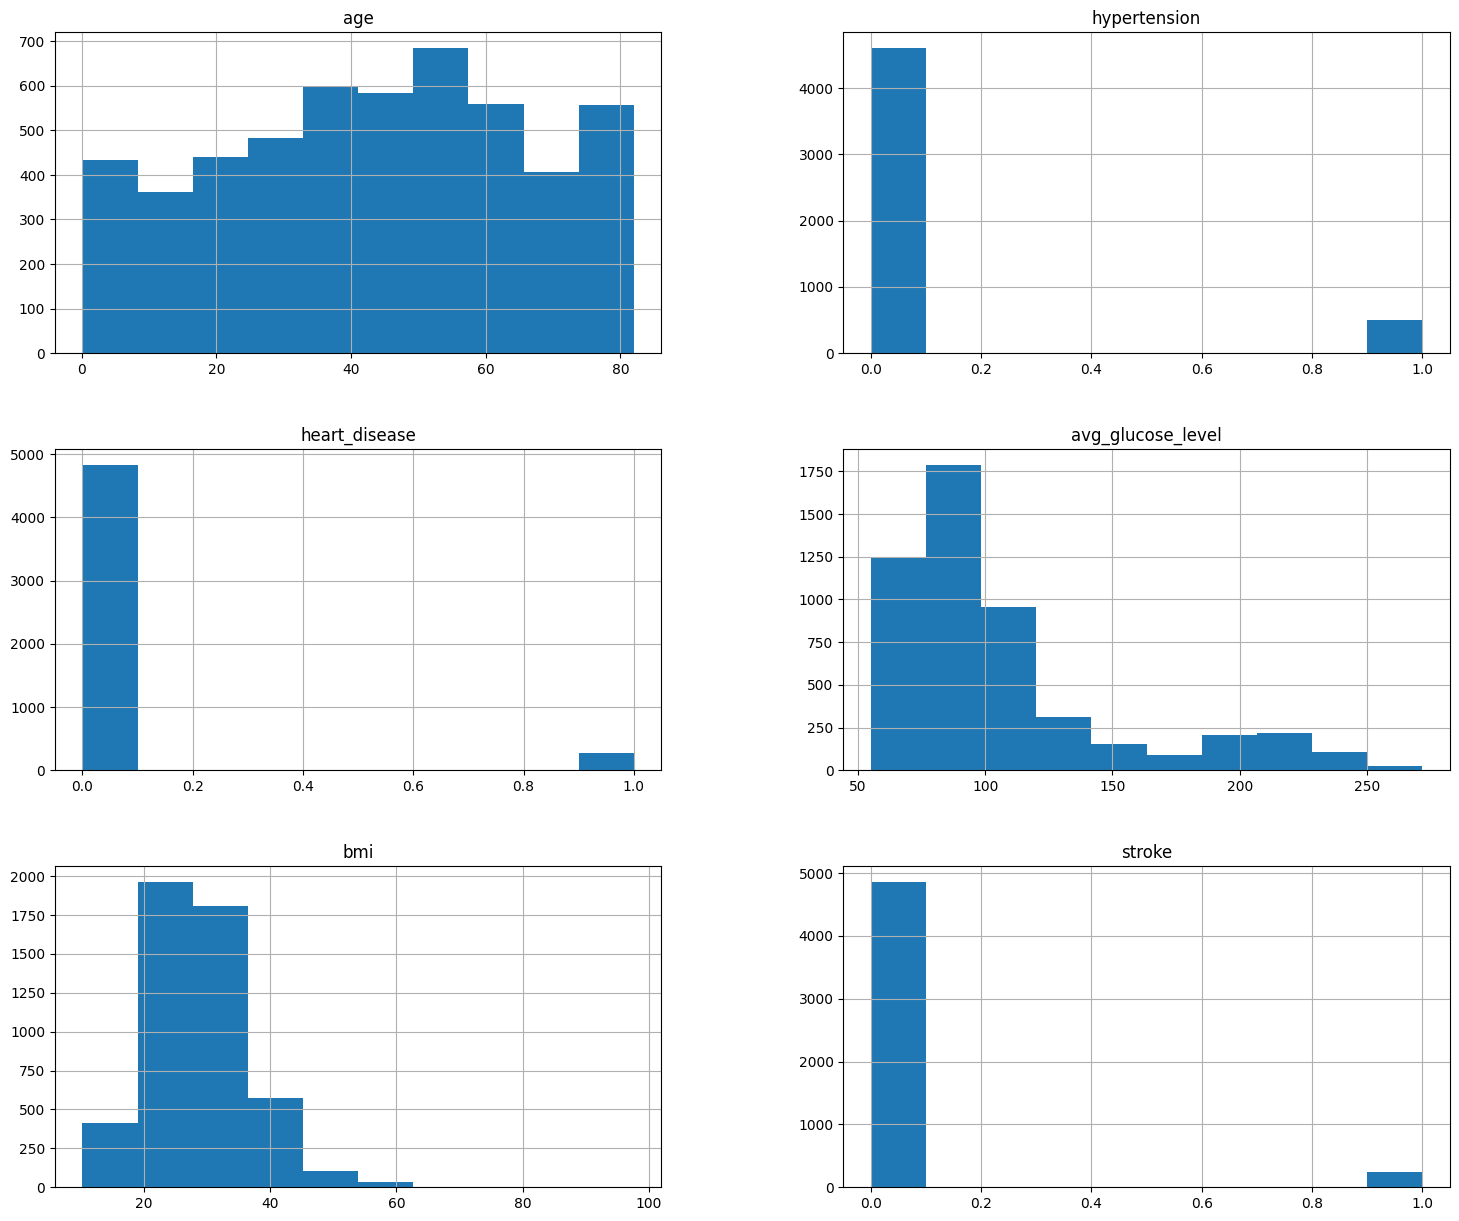

In [124]:
# univariate analysis visualizations

#histogram
import matplotlib.pyplot as plt

data2 = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]

data2.hist(figsize=(18,15))
plt.show()


In [125]:
#heatmap with correlation matrix

# correlation matrix
hm = data2.corr()
hm

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.276398       0.263796           0.238171   
hypertension       0.276398      1.000000       0.108306           0.174474   
heart_disease      0.263796      0.108306       1.000000           0.161857   
avg_glucose_level  0.238171      0.174474       0.161857           1.000000   
bmi                0.333398      0.167811       0.041357           0.175502   
stroke             0.245257      0.127904       0.134914           0.131945   

                        bmi    stroke  
age                0.333398  0.245257  
hypertension       0.167811  0.127904  
heart_disease      0.041357  0.134914  
avg_glucose_level  0.175502  0.131945  
bmi                1.000000  0.042374  
stroke             0.042374  1.000000

Axes(0.125,0.11;0.62x0.77)


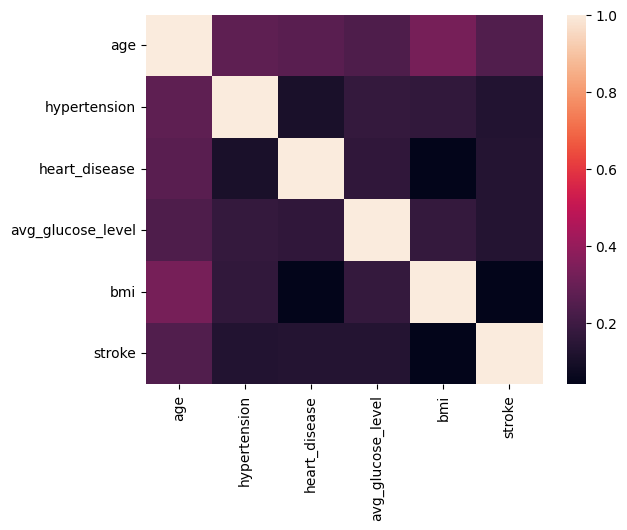

In [126]:
# heatmap
# visualize the strength of correlation between variables
heatmap = sns.heatmap(hm)
print(heatmap)

## Converting the categorical data into numerical data

In [127]:
# Display the original dataset
print("Original dataset:")
print(data.head())

# Use one-hot encoding for categorical variables
data1 = pd.get_dummies(df, columns=['smoking_status', 'gender', 'work_type', 'ever_married', 'Residence_type'])
print(data1.head())


Original dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
      id   age  hypertension  heart_di

In [128]:
data1.shape

(5110, 23)

In [129]:
data1.dtypes

id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
ever_married_No                     uint8
ever_married_Yes                    uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
dtype: object

In [130]:
columns_to_convert = [col for col in data1.columns if col != 'id']
data2 = data1[columns_to_convert].astype(float)

In [131]:
data2.dtypes

age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
ever_married_No                   float64
ever_married_Yes                  float64
Residence_type_Rural              float64
Residence_type_Urban              float64
dtype: object

In [132]:
# performing descriptive statistics on a dataset

# descriptive analysis
data2.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  smoking_status_Unknown  \
count  4909.000000  5110.000000             5110.000000   
mean     28.893237     0.048728                0.302153   
std       7.854067     0.215320                0.459236   
min      10.300000     0.000000                0.000000   
25%      23.500000     0.000000                0.000000   
50%      28.100000     0.000000                0.000000   
75%      33.100000     0.000000                1.000000   
max      97.600000     1.000000                1.000000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                     5110.000000                  5110.000000   
mean                         0.173190                     0.370254   
std                          0.378448                     0.482920   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

       smoking_status_smokes  ...  gender_Other  work_type_Govt_job  \
count            5110.000000  ...   5110.000000         5110.000000   
mean                0.154403  ...      0.000196            0.128571   
std                 0.361370  ...      0.013989            0.334758   
min                 0.000000  ...      0.000000            0.000000   
25%                 0.000000  ...      0.000000            0.000000   
50%                 0.000000  ...      0.000000            0.000000   
75%                 0.000000  ...      0.000000            0.000000   
max                 1.000000  ...      1.000000            1.000000   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
count             5110.000000        5110.000000              5110.000000   
mean                 0.004305           0.572407                 0.160274   
std                  0.065480           0.494778                 0.366896   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           0.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       work_type_children  ever_married_No  ever_married_Yes  \
count         5110.000000      5110.000000       5110.000000   
mean             0.134442         0.343836          0.656164   
std              0.341160         0.475034          0.475034   
min              0.000000         0.000000          0.000000   
25%              0.000000         0.000000          0.000000   
50%              0.000000         0.000000          1.000000   
75%              0.000000         1.000000          1.000000   
max              1.000000         1.000000          1.000000   

       Residence_type_Rural  Residence_type_Urban  
count           5110.000000           5110.000000  
mean               0.491977              0.508023  
std                0.499985              0.499985  
min                0.000000              0.000000  
25%                0.000000              0.000000 

In [133]:
# handling the missing values
data2.isna()

age  hypertension  heart_disease  avg_glucose_level    bmi  stroke  \
0     False         False          False              False  False   False   
1     False         False          False              False   True   False   
2     False         False          False              False  False   False   
3     False         False          False              False  False   False   
4     False         False          False              False  False   False   
...     ...           ...            ...                ...    ...     ...   
5105  False         False          False              False   True   False   
5106  False         False          False              False  False   False   
5107  False         False          False              False  False   False   
5108  False         False          False              False  False   False   
5109  False         False          False              False  False   False   

      smoking_status_Unknown  smoking_status_formerly smoked  \
0                      False                           False   
1                      False                           False   
2                      False                           False   
3                      False                           False   
4                      False                           False   
...                      ...                             ...   
5105                   False                           False   
5106                   False                           False   
5107                   False                           False   
5108                   False                           False   
5109                   False                           False   

      smoking_status_never smoked  smoking_status_smokes  ...  gender_Other  \
0                           False                  False  ...         False   
1                           False                  False  ...         False   
2                           False                  False  ...         False   
3                           False                  False  ...         False   
4                           False                  False  ...         False   
...                           ...                    ...  ...           ...   
5105                        False                  False  ...         False   
5106                        False                  False  ...         False   
5107                        False                  False  ...         False   
5108                        False                  False  ...         False   
5109                        False                  False  ...         False   

      work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0                  False                   False              False   
1                  False                   False              False   
2                  False                   False              False   
3                  False                   False              False   
4                  False                   False              False   
...                  ...                     ...                ...   
5105               False                   False              False   
5106               False                   False              False   
5107               False                   False              False   
5108               False                   False              False   
5109               False                   False              False   

      work_type_Self-employed  work_type_children  ever_married_No  \
0                       False               False            False   
1                       False               False            False   
2                       False               False            False   
3                       False               False            False   
4                       False               False            False   
...                       ...                 ...              ...   
5105      

In [134]:
data2.isnull().sum()

age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
stroke                              0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
gender_Female                       0
gender_Male                         0
gender_Other                        0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
ever_married_No                     0
ever_married_Yes                    0
Residence_type_Rural                0
Residence_type_Urban                0
dtype: int64

In [135]:
data2['bmi'].fillna(data2['bmi'].mean(),inplace=True)
data2.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
gender_Female                     0
gender_Male                       0
gender_Other                      0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
ever_married_No                   0
ever_married_Yes                  0
Residence_type_Rural              0
Residence_type_Urban              0
dtype: int64

In [136]:
data2.shape

(5110, 22)

In [137]:
# X and y split
y = data2['stroke']

In [138]:
X = data2.drop(columns=['stroke','gender_Female',
       'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'ever_married_No',
       'ever_married_Yes', 'Residence_type_Rural', 'Residence_type_Urban'])


In [139]:
X.tail(10)

age  hypertension  heart_disease  avg_glucose_level        bmi  \
5100  82.0           1.0            0.0              71.97  28.300000   
5101  45.0           0.0            0.0              97.95  24.500000   
5102  57.0           0.0            0.0              77.93  21.700000   
5103  18.0           0.0            0.0              82.85  46.900000   
5104  13.0           0.0            0.0             103.08  18.600000   
5105  80.0           1.0            0.0              83.75  28.893237   
5106  81.0           0.0            0.0             125.20  40.000000   
5107  35.0           0.0            0.0              82.99  30.600000   
5108  51.0           0.0            0.0             166.29  25.600000   
5109  44.0           0.0            0.0              85.28  26.200000   

      smoking_status_Unknown  smoking_status_formerly smoked  \
5100                     0.0                             0.0   
5101                     1.0                             0.0   
5102                     0.0                             0.0   
5103                     1.0                             0.0   
5104                     1.0                             0.0   
5105                     0.0                             0.0   
5106                     0.0                             0.0   
5107                     0.0                             0.0   
5108                     0.0                             1.0   
5109                     1.0                             0.0   

      smoking_status_never smoked  smoking_status_smokes  
5100                          1.0                    0.0  
5101                          0.0                    0.0  
5102                          1.0                    0.0  
5103                          0.0                    0.0  
5104                          0.0                    0.0  
5105                          1.0                    0.0  
5106                          1.0                    0.0  
5107                          1.0                    0.0  
5108                          0.0                    0.0  
5109                          0.0                    0.0

In [140]:
X.shape

(5110, 9)

In [141]:
# standard scaling
name = X.columns
print(name)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')


In [142]:
from sklearn.preprocessing import StandardScaler

In [143]:
scale = StandardScaler()

In [144]:
X_scaled = scale.fit_transform(X)
print(X_scaled)

[[ 1.05143428 -0.32860186  4.18503199 ...  2.1849511  -0.7667743
  -0.42731326]
 [ 0.78607007 -0.32860186 -0.2389468  ... -0.45767615  1.30416474
  -0.42731326]
 [ 1.62639008 -0.32860186  4.18503199 ... -0.45767615  1.30416474
  -0.42731326]
 ...
 [-0.36384151 -0.32860186 -0.2389468  ... -0.45767615  1.30416474
  -0.42731326]
 [ 0.34379639 -0.32860186 -0.2389468  ...  2.1849511  -0.7667743
  -0.42731326]
 [ 0.03420481 -0.32860186 -0.2389468  ... -0.45767615 -0.7667743
  -0.42731326]]


In [145]:
X = pd.DataFrame(X_scaled,columns=name)

In [146]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [147]:
X_train.head()

age  hypertension  heart_disease  avg_glucose_level       bmi  \
1921  0.034205     -0.328602      -0.238947          -0.236040  0.325669   
4074  1.184116     -0.328602      -0.238947           1.152459  0.598494   
2311 -1.860496     -0.328602      -0.238947          -0.908535 -1.545125   
3080  1.361026     -0.328602      -0.238947          -0.498412 -1.389226   
1620  1.007207     -0.328602      -0.238947          -0.455567  0.143787   

      smoking_status_Unknown  smoking_status_formerly smoked  \
1921               -0.658011                       -0.457676   
4074               -0.658011                       -0.457676   
2311                1.519732                       -0.457676   
3080               -0.658011                       -0.457676   
1620               -0.658011                       -0.457676   

      smoking_status_never smoked  smoking_status_smokes  
1921                    -0.766774               2.340204  
4074                     1.304165              -0.427313  
2311                    -0.766774              -0.427313  
3080                     1.304165              -0.427313  
1620                     1.304165              -0.427313

In [148]:
X.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [149]:
X_test.head()

age  hypertension  heart_disease  avg_glucose_level       bmi  \
42    1.714845     -0.328602       4.185032           0.855854 -0.323912   
380  -1.734890     -0.328602      -0.238947           0.001597 -1.584100   
3524  0.653388     -0.328602      -0.238947          -0.578582 -0.388870   
352  -1.027252     -0.328602      -0.238947          -0.211525  0.676443   
4927 -1.469526     -0.328602      -0.238947          -0.801863 -1.973849   

      smoking_status_Unknown  smoking_status_formerly smoked  \
42                 -0.658011                       -0.457676   
380                 1.519732                       -0.457676   
3524               -0.658011                       -0.457676   
352                -0.658011                       -0.457676   
4927                1.519732                       -0.457676   

      smoking_status_never smoked  smoking_status_smokes  
42                      -0.766774               2.340204  
380                     -0.766774              -0.427313  
3524                     1.304165              -0.427313  
352                      1.304165              -0.427313  
4927                    -0.766774              -0.427313

In [150]:
y_train.head()

1921    0.0
4074    0.0
2311    0.0
3080    0.0
1620    0.0
Name: stroke, dtype: float64

In [151]:
y_test.head()

42      1.0
380     0.0
3524    0.0
352     0.0
4927    0.0
Name: stroke, dtype: float64

In [152]:
# building the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# training the model
model = model.fit(X_train,y_train)
# testing the model
pred = model.predict(X_test)
print(pred)

[ 0.21473757 -0.01555655  0.06173867 ...  0.02480763  0.1207749
  0.07449123]


In [153]:
# evaluating the model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr_accuracy = r2_score(y_test,pred)*100
print(lr_accuracy)
lrmse = mean_squared_error(y_test,pred)
print("linear regression mean squared error: ",lrmse)
lrmae = mean_absolute_error(y_test,pred)
print("linear regression mean absolute error: ",lrmae)

5.87810070593039
linear regression mean squared error:  0.044348559363627985
linear regression mean absolute error:  0.0956022896591197


In [154]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=5, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_accuracy = r2_score(y_test, rf_pred)*100
rf_mae = mean_absolute_error(y_test,rf_pred)
print(rf_accuracy)

print(rf_mse)

print(rf_mae)

-17.73138749413001
0.055472928897586433
0.08610567514677103


In [155]:
#gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gbr = GradientBoostingRegressor()

# Train the model
gbr.fit(X_train, y_train)

# test the model
gb_pred = gbr.predict(X_test)

# evaluate
gb_mse = mean_squared_error(y_test, gb_pred)
gb_accuracy = r2_score(y_test, gb_pred)*100
gb_mae = mean_absolute_error(y_test,gb_pred)

print(gb_accuracy)

print(gb_mse)

print(gb_mae)

7.0754715408289925
0.043784379593032094
0.08481320777704972


In [156]:
# Split the data into features (X) and target variable (y)
X = data2.drop(['stroke','gender_Female',
       'gender_Male', 'gender_Other', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'ever_married_No',
       'ever_married_Yes', 'Residence_type_Rural', 'Residence_type_Urban'], axis=1)

y = data2['stroke']

In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [158]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
# Train and test various machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Linear SVM': SVC(kernel='linear'),
    'RBF SVM': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}


In [160]:
for name, model in models.items():
    print(f"Training and testing {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy : {accuracy*100}")
    print("Classification Report:")
    print(report)
    print("="*50)

Training and testing Logistic Regression...
Accuracy : 94.19439008480104
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1444
         1.0       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Training and testing Naive Bayes...
Accuracy : 86.7579908675799
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      1444
         1.0       0.20      0.42      0.27        89

    accuracy                           0.87      1533
   macro avg       0.58      0.66      0.60      1533
weighted avg       0.92      0.87      0.89      1533

Training and testing K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 93.9334637964775
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1444
         1.0       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533

Training and testing Linear SVM...
Accuracy : 94.19439008480104
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1444
         1.0       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Training and testing RBF SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Accuracy : 94.19439008480104
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1444
         1.0       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Training and testing Decision Tree...
Accuracy : 91.12850619699935
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      1444
         1.0       0.19      0.16      0.17        89

    accuracy                           0.91      1533
   macro avg       0.57      0.56      0.56      1533
weighted avg       0.90      0.91      0.91      1533

Training and testing Random Forest...
Accuracy : 94.06392694063926
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1444
     

In [161]:

# Create a table to store scores and values
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Classification Report'])

for name, model in models.items():
    print(f"Training and testing {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)*100
    report = classification_report(y_test, y_pred)

    # Append results to the table
    results_table = results_table.append({
        'Model': name,
        'Accuracy': accuracy,
        'Classification Report': report
    }, ignore_index=True)



Training and testing Logistic Regression...
Training and testing Naive Bayes...
Training and testing K-Nearest Neighbors...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-161-523d88a714d7>:13: FutureWarning: The frame.ap

Training and testing Linear SVM...
Training and testing RBF SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-161-523d88a714d7>:13: FutureWarning: The frame.ap

Training and testing Decision Tree...
Training and testing Random Forest...
Training and testing XGBoost...


<ipython-input-161-523d88a714d7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
<ipython-input-161-523d88a714d7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


In [162]:
# Display the results table
print("Results Table:")
print(results_table)

Results Table:
                 Model   Accuracy  \
0  Logistic Regression  94.194390   
1          Naive Bayes  86.757991   
2  K-Nearest Neighbors  93.933464   
3           Linear SVM  94.194390   
4              RBF SVM  94.194390   
5        Decision Tree  90.998043   
6        Random Forest  94.063927   
7              XGBoost  93.803001   

                               Classification Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  
5                precision    recall  f1-score   ...  
6                precision    recall  f1-score   ...  
7                precision    recall  f1-score   ...  


In [178]:
from prettytable import PrettyTable

# Define the column names
columns = ["Model", "Accuracy"]

# Update the DataFrame with Model, Accuracy, and other metrics
accuracy_values = [94.19439008480104, 86.7579908675799, 93.9334637964775, 94.19439008480104, 94.19439008480104,
                   91.12850619699935, 94.06392694063926, 93.80300065231572]

data = {'Model': Model, 'Accuracy': accuracy_values}
df = pd.DataFrame(data)

# Create a PrettyTable object
table = PrettyTable()
table.field_names = columns

# Populate the table with data
for _, row in df.iterrows():
    table.add_row([row["Model"], f"{row['Accuracy']:.2f}%"])

# Print the table
print(table)


+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
| Logistic Regression |  94.19%  |
|     Naive Bayes     |  86.76%  |
| K-Nearest Neighbors |  93.93%  |
|      Linear SVM     |  94.19%  |
|       RBF SVM       |  94.19%  |
|    Decision Tree    |  91.13%  |
|    Random Forest    |  94.06%  |
|       XGBoost       |  93.80%  |
+---------------------+----------+


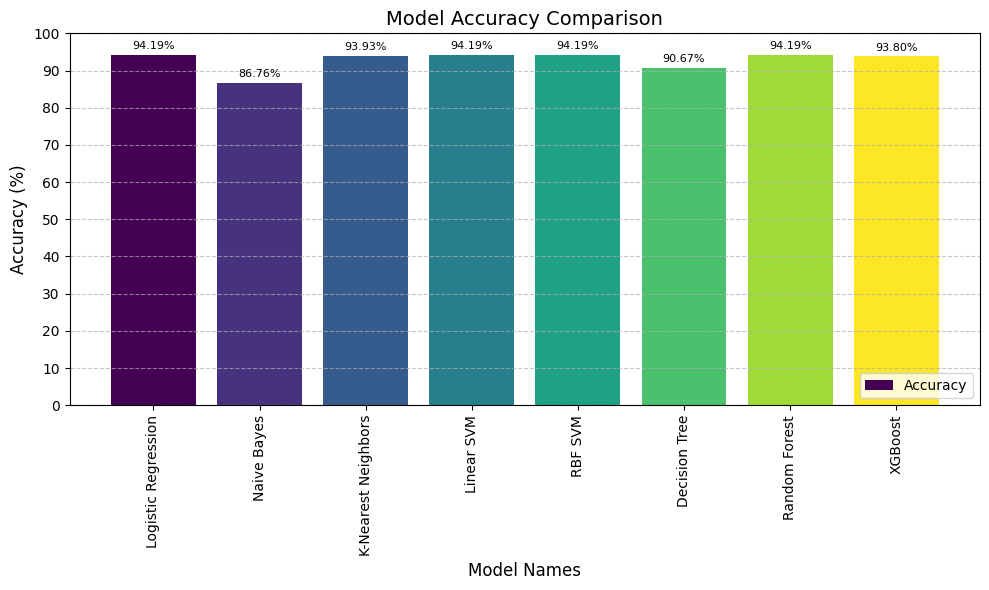

In [165]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
Model = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'XGBoost']
Accuracy = [94.194390, 86.757991, 93.933464, 94.194390, 94.194390, 90.671885, 94.194390, 93.803001]

# Set a color palette for better differentiation
colors = plt.cm.viridis(np.linspace(0, 1, len(Model)))

# Creating the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(Model, Accuracy, color=colors)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data values on top of the bars
for bar, acc in zip(bars, Accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{acc:.2f}%', ha='center', va='bottom', fontsize=8)

# Customize plot appearance
plt.xlabel('Model Names', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim(0, 100)  # Set the y-axis limit to represent percentage
plt.yticks(range(0, 101, 10))

# Add a legend
plt.legend(['Accuracy'], loc='lower right', fontsize=10)

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.tight_layout()
plt.show()


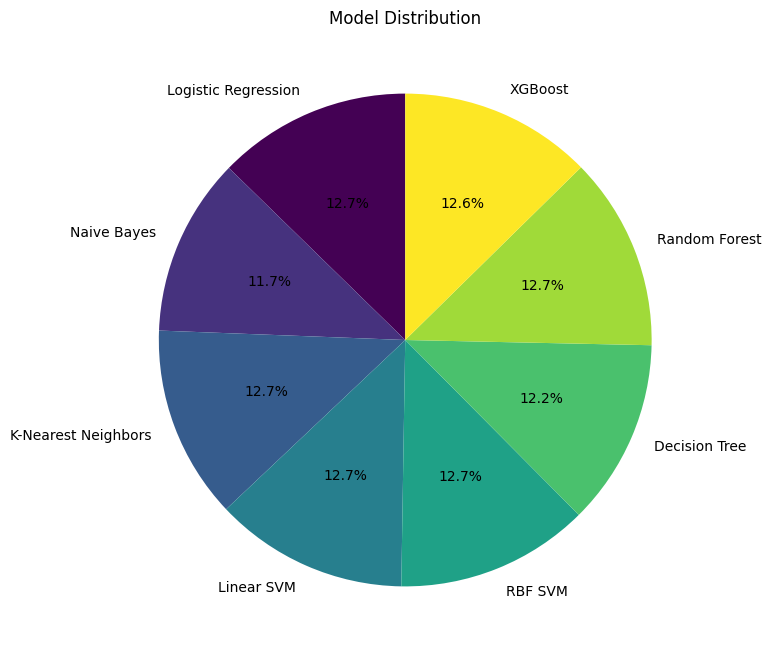

In [170]:
plt.figure(figsize=(8, 8))
plt.pie(Accuracy, labels=Model, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Model Distribution')
plt.show()


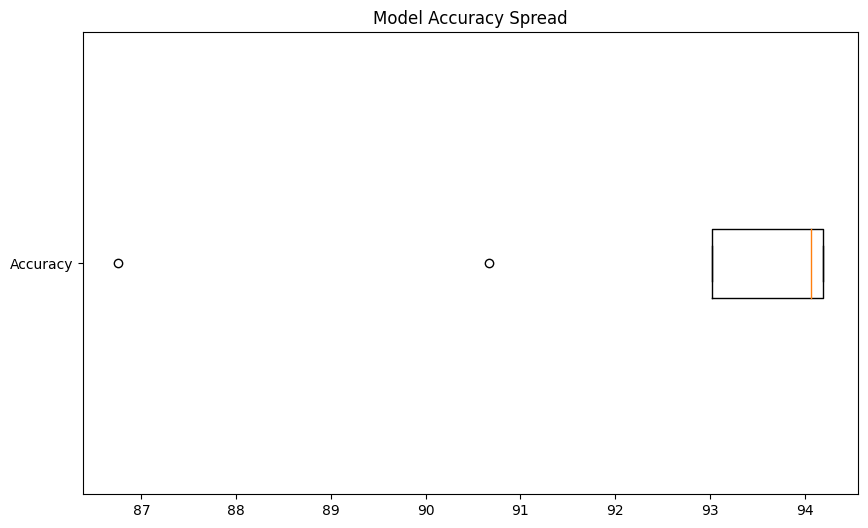

In [168]:
plt.figure(figsize=(10, 6))
plt.boxplot(Accuracy, vert=False)
plt.yticks([1], ['Accuracy'])
plt.title('Model Accuracy Spread')
plt.show()

<ipython-input-183-1ea7d2adf01c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=Model, y=Accuracy, palette='viridis')


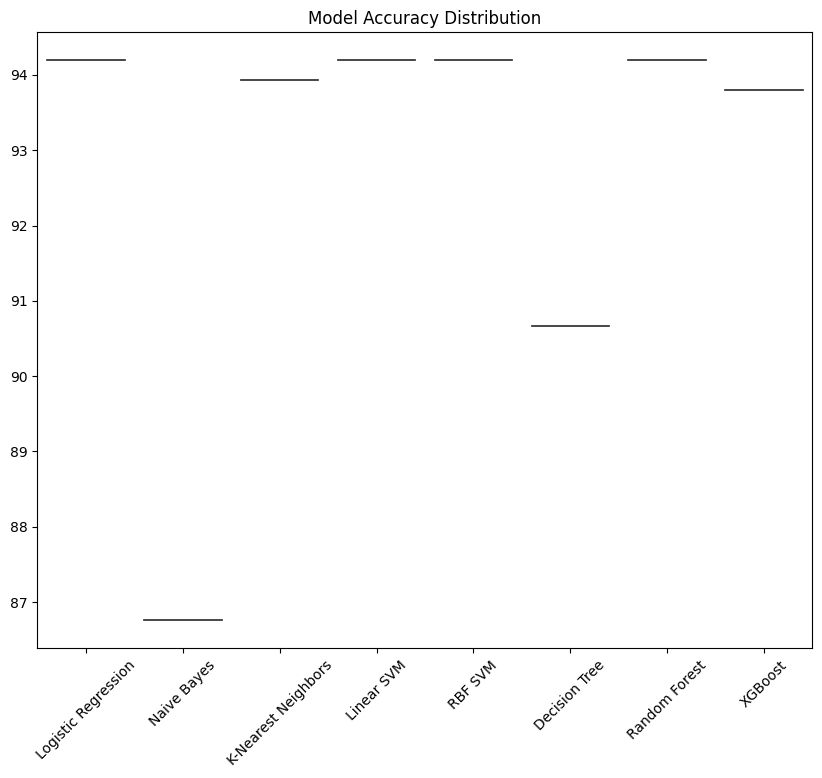

In [183]:
plt.figure(figsize=(10, 8))
sns.violinplot(x=Model, y=Accuracy, palette='viridis')
plt.title('Model Accuracy Distribution')
plt.xticks(rotation=45)
plt.show()